In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Downloads//churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
newgender=le.fit_transform(df["gender"])
newgender

array([0, 1, 1, ..., 0, 1, 1])

In [5]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
x=df.iloc[:,3:20].values
x

array([['Yes', 'No', 1, ..., 'Electronic check', 29.85, '29.85'],
       ['No', 'No', 34, ..., 'Mailed check', 56.95, '1889.5'],
       ['No', 'No', 2, ..., 'Mailed check', 53.85, '108.15'],
       ...,
       ['Yes', 'Yes', 11, ..., 'Electronic check', 29.6, '346.45'],
       ['Yes', 'No', 4, ..., 'Mailed check', 74.4, '306.6'],
       ['No', 'No', 66, ..., 'Bank transfer (automatic)', 105.65,
        '6844.5']], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
OH=OneHotEncoder()
X=OH.fit_transform(x)
X

<7043x8228 sparse matrix of type '<class 'numpy.float64'>'
	with 119731 stored elements in Compressed Sparse Row format>

In [9]:
y=df.iloc[:,20].values
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

In [11]:
y


array([0, 0, 1, ..., 0, 1, 0])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [14]:
rfc=RandomForestClassifier(n_estimators=200,criterion="gini",max_features=15)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [15]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7785663591199432


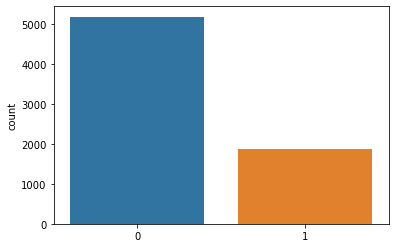

In [16]:
sns.countplot(y)
plt.show()


In [17]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
#import XGBoost classifier and accuracy
from sklearn.model_selection import XGBClassifier
from sklearn.metrics import accuracy_score


ImportError: cannot import name 'XGBClassifier' from 'sklearn.model_selection' (C:\Users\Gangadhar Kurma\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [28]:
from xgboost.sklearn import XGBClassifier as xgb

In [29]:
xgb=XGBClassifier()

In [35]:
from sklearn.metrics import accuracy_score

In [39]:
#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
accuracy*100

78.85024840312278

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
adb=AdaBoostClassifier()

In [42]:
adb=AdaBoostClassifier(n_estimators=200,learning_rate=1)

In [49]:
adb=adb.fit(X_train,y_train)
y_pred=adb.predict(X_test)
accuracy=print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7885024840312278


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt=DecisionTreeClassifier(max_depth=10,max_features=15,max_leaf_nodes=5)
dtc=dt.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7388218594748048


In [58]:
from sklearn.neighbors import KNeighborsClassifier


In [69]:
knn=KNeighborsClassifier(n_neighbors=10)

In [70]:
kn=knn.fit(X_train,y_train)
y_pred=kn.predict(X_test)

In [71]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.765791341376863
